# Tutorial 04: Numpy, Matplotlib, and Pandas

---

## What we talked about last time
- loops
- flow control
- dictionaries
- functions
- started with numpy

---

## Recap: exercise # 1

---

## Plan for today
- Numpy (data inspection and maniplulation)
- Matplotlib (plotting)
- Pandas (data analysis)

---

## Numpy (cont.)

In [1]:
import numpy as np

## Data Inspection

In [2]:
data = np.random.random((4, 3))

In [3]:
data

array([[0.51088357, 0.04822539, 0.94799129],
       [0.15342383, 0.97714809, 0.47042236],
       [0.36270648, 0.41636838, 0.2687166 ],
       [0.89943209, 0.37306417, 0.65851903]])

In [4]:
data.dtype

dtype('float64')

In [5]:
data.ndim

2

In [6]:
data.shape

(4, 3)

In [7]:
data.size

12

## Aggregation

In [8]:
data.sum()

6.086901282900801

#### Aggregation along a specific dimension

You can also apply aggregate functions along a specific "dimension" (e.g. in case of a 2-dimensional array we have rows and columns). You can perform the aggregration along a specific dimension by setting the `axis` argument inside the aggregation function (e.g. `sum()`). 
To perform the aggregation along rows use `axis=0`, and for columns use `axis=1`

**Why rows are specified with `axis=0` (or columns with `axis=1`)?** <br>
The number you specify for the `axis` argument is  same as the index of that dimension when you call `.shape`. For instance, when you call `.shape` on a 2-d array, the first number (index 0) is the number of rows and the second number (index 1) is the number of columns.

In [9]:
data.sum(axis=0) # compute the sum across rows (for each columns)

array([1.92644596, 1.81480604, 2.34564928])

In [10]:
data.sum(axis=1) # compute the sum across columns (for each columns)

array([1.50710025, 1.60099428, 1.04779146, 1.93101529])

In [11]:
data.min()  # axis
data.max()
data.mean()
data.std()

0.2934093487504676

In [12]:
data.cumsum()

array([0.51088357, 0.55910896, 1.50710025, 1.66052408, 2.63767217,
       3.10809453, 3.47080101, 3.88716939, 4.15588599, 5.05531808,
       5.42838225, 6.08690128])

In [13]:
x = np.arange(11)
x, x.cumsum()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45, 55]))

### Data Transformation

Data Transformation is essentially the application of any kind of operation on your data so that you tranform your data from one representation to another, making it ready for upcoming analysis. Numpy provides a handful number of functions that can be used to transform the data. Let's go through some of them.

Let's start by creating a 2D array:

In [14]:
arr = [[1, 2, 3, 4], 
       [5, 6, 7, 8], 
       [9, 10, 11, 12], 
       [13, 14, 15, 16], 
       [17, 18, 19, 20]]

data = np.array(arr)
data

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20]])

<br>
We can change our 2D array so that the rows become columns and the columns become rows (i.e., transpose)

In [15]:
data.T

array([[ 1,  5,  9, 13, 17],
       [ 2,  6, 10, 14, 18],
       [ 3,  7, 11, 15, 19],
       [ 4,  8, 12, 16, 20]])

<br>

We can also change the shape of the whole array using the `reshape`:

In [16]:
data

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20]])

In [17]:
data.reshape(2, 10)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]])

<br>

We can do more with `reshape`. Let's say you do not know the dimensions of the resulting data exactly, but you want to have a fixed number of rows, and you don't care about the number of columns (or the other way around) -> you can use the `-1` for the size of the dimension you don't care about.

In [18]:
data.reshape(10, -1) # in this case we are fixing the number of rows and dont care about the number of columns

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12],
       [13, 14],
       [15, 16],
       [17, 18],
       [19, 20]])

<br>

With `reshape` we will preserve all the data points in our array. What if we know that we want the first $N$ (in this example $N=8$) elements and we want the with a specific shape?

In [19]:
np.resize(data, (4, 2))

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

What we want to add a new dimension to our array?

In [20]:
np.expand_dims(data, axis=2).shape

(5, 4, 1)

In [21]:
data.flatten()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

Beside changing the shape of our data, we can also play around on the level of data elements (i.e., applying functions on them)

In [22]:
a = np.arange(11, 21)
b = np.arange(1, 11)

print("a is", a)
print("b is", b)

a is [11 12 13 14 15 16 17 18 19 20]
b is [ 1  2  3  4  5  6  7  8  9 10]


<br>

Here are two example of such functions

In [23]:
b_exp = np.exp(b)
np.log(b_exp)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

But there are more:

``` python
np.add(a, b) # a + b
np.subtract(a, b) # a - b
np.multiply(a, b) # a * b
np.divide(a, b) # a / b
np.remainder(a, b) # a % b
np.sin()
np.cos()
# etc.
```

## Slicing

Similar to what we learned before for indexing and slicing lists, numpy arrays can be indexed and sliced the same way, in all dimensions.

<div style="text-align:center">
    <img src ="indexing.png" height="700" width="700"/>
</div>

In [24]:
a = np.arange(11)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [25]:
a[0]

0

In [26]:
a[1]

1

In [27]:
a[-1]

10

In [28]:
a[-2]

9

In [29]:
a[0:3] # returns index 0, 1, and 2

array([0, 1, 2])

In [30]:
a[:3]

array([0, 1, 2])

In [31]:
a[1:3] # returns index 1 and 2

array([1, 2])

In [32]:
a[1:]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Note that we are alway jumping by 1 index (starting from index 1, and go through all of them till the end)

In [33]:
a[1:9:2]

array([1, 3, 5, 7])

In [34]:
aa = np.arange(25).reshape(5, 5)
aa

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [35]:
aa[0, 0]

0

In [36]:
aa[:3, :3]

array([[ 0,  1,  2],
       [ 5,  6,  7],
       [10, 11, 12]])

## Masking

The basic idea of masking is to index your data not by explicitly using the index values, but rather use another data to crop the data. We can also think of this as conditioned slicing.

In [37]:
aa = np.arange(5)
aa

array([0, 1, 2, 3, 4])

In [38]:
aa[[True, False, False, False, True]]

array([0, 4])

In [39]:
aa > 2

array([False, False, False,  True,  True])

In [40]:
aa[aa > 2]

array([3, 4])

## Combining Arrays

<div style="text-align:center">
    <img src ="split_stack.png" height="600" width="600"/>
</div>

In [41]:
a = np.arange(9).reshape(3, 3)
b = np.arange(9, 18).reshape(3, 3)

In [42]:
a, b

(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]),
 array([[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]]))

In [43]:
np.append(a, b, axis=0)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17]])

In [44]:
np.vstack((a, b))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17]])

In [45]:
np.hstack((a, b))

array([[ 0,  1,  2,  9, 10, 11],
       [ 3,  4,  5, 12, 13, 14],
       [ 6,  7,  8, 15, 16, 17]])

In [46]:
dd = np.arange(16).reshape(4, 4)
dd

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [47]:
dd_left, dd_right = np.hsplit(dd, 2)

In [48]:
dd_left

array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13]])

In [49]:
dd_right

array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15]])

In [50]:
dd_up, dd_down = np.vsplit(dd, 2)

In [51]:
dd

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [52]:
np.vsplit(dd, (2, 3)) # the indeces: left: upper bound for the rows starting from 0, right: lower bound for the rows till the end

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15]])]

In [53]:
dd.shape

(4, 4)

## Saving the Array

**save()**: saves data in .npy format

And if you want to load data from a `.npy` file, you can use `np.load()`

In [54]:
# save() example
x = np.arange(10)

outfile = 'test_save'
np.save(outfile, x)

In [55]:
# import the .npy file
np.load(outfile + '.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Exercise #2

---

## Matplotlib

Humans are very visual creatures: we understand things better when we see them visualized. Matplotlib is a flexible python library which can help you visualize your data. 

<div style="text-align:center">
    <img src ="mpl.png" height="1200" width="1200"/>
</div>

### -> Slides

You don’t need much to get started: you need to make the necessary imports, prepare some data, and you can start plotting with the help of the `plot()` function! Once you created your plot, you might need to explicitly write a command to show it, `show()`.

In [56]:
import matplotlib.pyplot as plt

We can also create plots from lists, as long as they are numbers

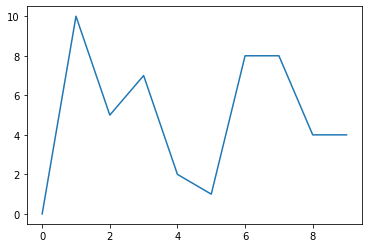

In [57]:
plt.plot([0, 10, 5, 7, 2, 1, 8, 8, 4, 4]);

Note that this results in a figure that contains the values (y axis) and their correspondign index number (x axis)

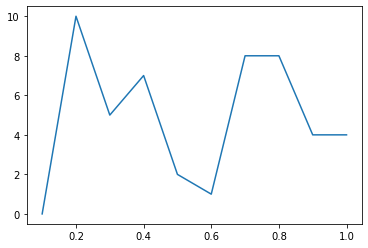

In [58]:
y = [0, 10, 5, 7, 2, 1, 8, 8, 4, 4]
x = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1] 
plt.plot(x, y);

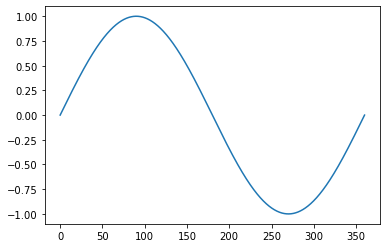

In [59]:
x = np.arange(0, 360, .01)
x_rad = np.deg2rad(x)

y = np.sin(x_rad)
plt.plot(x, y);

### Modifying line properties

- color
- style
- width

**Colors** can be specified in different ways in matplotlib:
- an RGB or RGBA tuple of float values defined between 0 and 1 (0 to 255 normalized)
- a string representation of a float value defined between 0 and 1. This is used for grayscale
- one of the characters below

| Character | Color |
|-----------|-------|
|   'b'     |  blue |
|   'g'     |  green |
|   'r'     |  red |
|   'c'     |  cyan |
|   'm'     |  magenta |
|   'y'     |  yellow |
|   'k'     |  black |
|   'w'     |  white |

There are mainly four **line styles** available in matplotlib:
- "dotted" <-> ":"
- "dashdot" <-> "-."
- "dashed" <-> "--"
- "solid" (default) <-> "-"

you can use the following line to get a docstring:
![linestyle](https://matplotlib.org/_images/sphx_glr_line_styles_reference_001.png)

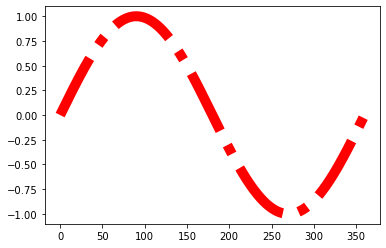

In [60]:
plt.plot(x, y, color='r', linestyle='-.', linewidth=10);

### Other types of plots

The example above is called a "line" plot. But there are many other types of plots that may suit the data better:
- scatter plots (for unordered data points)
- histogram
- etc. (visit the [gallery](https://matplotlib.org/stable/gallery/index.html) to find out more)

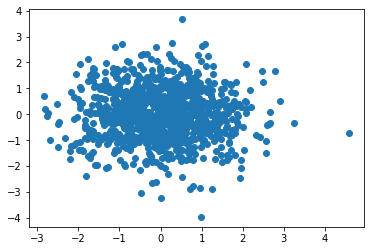

In [157]:
x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x, y);

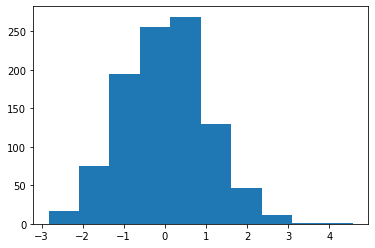

In [158]:
plt.hist(x);

### Modifying the axes

No matter what type of plots you have you can edit some of the features of your plot, for example:
- axes range
- axes label
- ticks and ticklabels

#### Let's optimize our line plot further

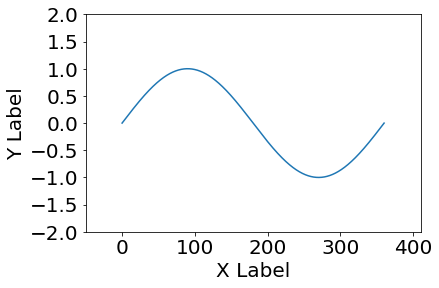

In [62]:
x_rad = np.deg2rad(x)
y = np.sin(x_rad)
plt.plot(x, y)

plt.xlim(-50, 410)
plt.ylim(-2, 2)

plt.xlabel('X Label', fontsize=20)
plt.ylabel('Y Label', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

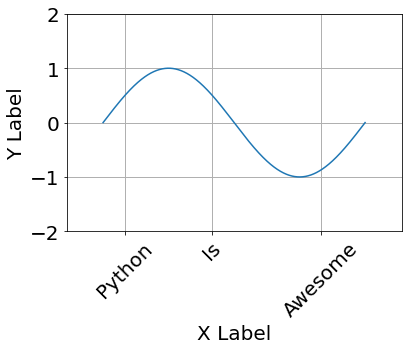

In [63]:
x_rad = np.deg2rad(x)
y = np.sin(x_rad)
plt.plot(x, y)

plt.xlim(-50, 410)
plt.ylim(-2, 2)

plt.xlabel('X Label', fontsize=20)
plt.ylabel('Y Label', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xticks([30, 150, 300], ['Python', 'Is', 'Awesome'], fontsize=20, rotation=45);
plt.yticks([-2., -1, 0, 1, 2])

plt.grid(linewidth=1)

plt.show()

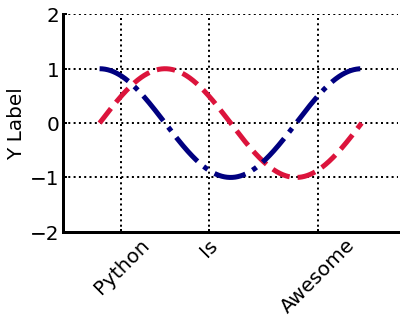

In [64]:
x_rad = np.deg2rad(x)
y1 = np.sin(x_rad)
y2 = np.cos(x_rad)
plt.plot(x, y1, color="crimson", lw=5, ls='--')
plt.plot(x, y2, color="navy", lw=5, ls='-.')

plt.xlim(-50, 410)
plt.ylim(-2, 2)

# plt.xlabel('X Label', fontsize=20)
plt.ylabel('Y Label', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xticks([30, 150, 300], ['Python', 'Is', 'Awesome'], fontsize=20, rotation=45);
plt.yticks([-2., -1, 0, 1, 2])


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

ax.tick_params(width=2, direction="in")

plt.grid(linewidth=2, color='k', linestyle=":")

plt.show()

### Anatomy of matplotlib plot

In essence, there are two big components that you need to take into account:

- The **Figure** is the overall window or page that everything is drawn on. It’s the top-level component of all the ones that you will consider in the following points. You can create multiple independent Figures. A Figure can have several other things in it, such as a **suptitle**, which is a centered title to the figure. You’ll also find that you can add a **legend** and **color bar**, for example, to your Figure.

- To the figure you add Axes. The Axes is the area on which the data is plotted with functions such as `plot()` and `scatter()` and that can have ticks, labels, etc. associated with it. This explains why Figures can contain multiple Axes.
<div style="text-align:center">
    <a href="https://matplotlib.org/1.5.1/faq/usage_faq.html">
    <img src ="https://matplotlib.org/1.5.1/_images/fig_map.png" />
</div>

Let's do the same thing using the axes object

In [65]:
x_rad = np.deg2rad(x)
y1 = np.sin(x_rad)
y2 = np.cos(x_rad)

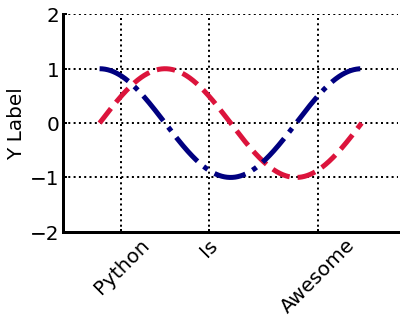

In [66]:
fig, ax = plt.subplots()

ax.plot(x, y1, color="crimson", lw=5, ls='--')
ax.plot(x, y2, color="navy", lw=5, ls='-.')

ax.set_xlim(-50, 410)
ax.set_ylim(-2, 2)

# plt.xlabel('X Label', fontsize=20)
ax.set_ylabel('Y Label', fontsize=20)

ax.set_xticks([30, 150, 300])
ax.set_xticklabels(['Python', 'Is', 'Awesome'], fontsize=20, rotation=45);

ax.set_yticks([-2., -1, 0, 1, 2])
ax.tick_params(axis="y", labelsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

ax.tick_params(width=2, direction="in")

ax.grid(linewidth=2, color='k', linestyle=":")

plt.show()

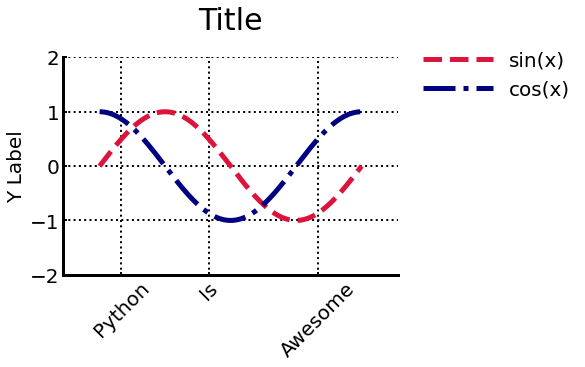

In [67]:
fig, ax = plt.subplots()

ax.plot(x, y1, color="crimson", lw=5, ls='--', label="sin(x)")
ax.plot(x, y2, color="navy", lw=5, ls='-.', label="cos(x)")

ax.set_xlim(-50, 410)
ax.set_ylim(-2, 2)

# plt.xlabel('X Label', fontsize=20)
ax.set_ylabel('Y Label', fontsize=20)

ax.set_xticks([30, 150, 300])
ax.set_xticklabels(['Python', 'Is', 'Awesome'], fontsize=20, rotation=45);

ax.set_yticks([-2., -1, 0, 1, 2])
ax.tick_params(axis="y", labelsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

ax.tick_params(width=2, direction="in")

ax.grid(linewidth=2, color='k', linestyle=":")

plt.legend(loc=(1.05, .77), frameon=False, fontsize=20, handlelength=3.5)

plt.title("Title", fontsize=30, y=1.1)

plt.show()

## Subplots

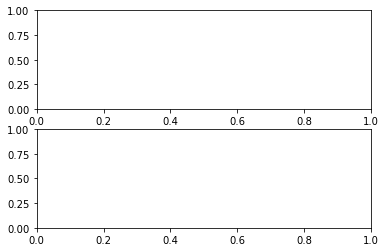

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=1)

In [69]:
axes

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

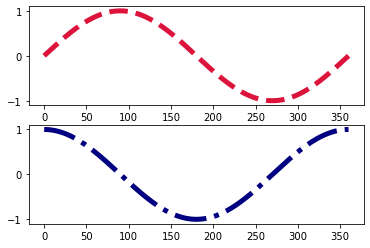

In [70]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

ax1.plot(x, y1, color="crimson", lw=5, ls='--', label="sin(x)")
ax2.plot(x, y2, color="navy", lw=5, ls='-.', label="cos(x)")

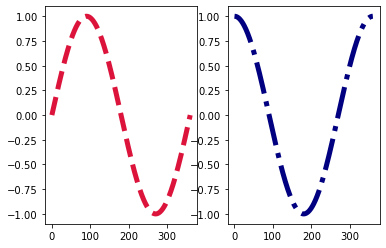

In [71]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.plot(x, y1, color="crimson", lw=5, ls='--', label="sin(x)")
ax2.plot(x, y2, color="navy", lw=5, ls='-.', label="cos(x)")

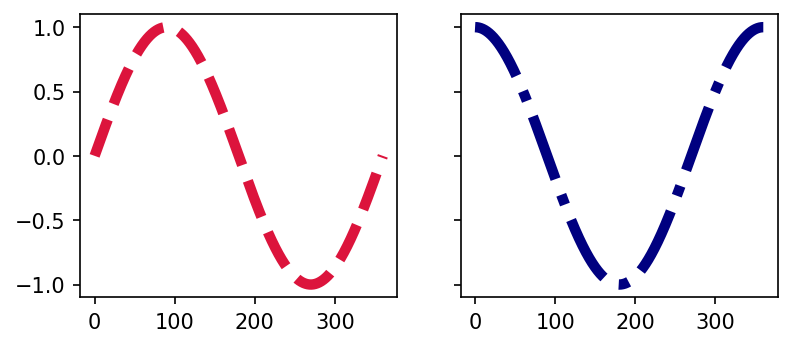

In [72]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(6, 2.5), dpi=150)

ax1.plot(x, y1, color="crimson", lw=5, ls='--', label="sin(x)")
ax2.plot(x, y2, color="navy", lw=5, ls='-.', label="cos(x)")

## Save the figure

In [73]:
fig.savefig("NameOfTheFile.png")

## Exercise #3

---

## Pandas

In [74]:
import pandas as pd

### What is Pandas? And why use it?

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to work with *relational* or *labeled* data. It stores data in a tabular form. Each table contains one or more data categories in columns, also called attributes. Each row, also called a record, contains a unique instance of the data represented by the table.

It is a fundamental high-level building block for doing practical, real world data analysis in Python. 

pandas is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure


Key features:
    
- Easy handling of **missing data**
- **Size mutability**: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically
- Powerful, flexible **group by functionality** to perform split-apply-combine operations on data sets
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets
- Intuitive **merging and joining** data sets
- Flexible **reshaping and pivoting** of data sets
- **Hierarchical labeling** of axes
- Robust **IO tools** for loading data from flat files, Excel files, databases, and HDF5
- **Time series functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

The most basic Pandas object is called a "Series". Pandas Series is a generalization of one-dimensional array with flexible indexing (one index per element in the column):

In [75]:
ages = [25, 30, 33, 28]
names = ['Mohammad', 'Nick', 'Hana', 'Anna']
ss = pd.Series(ages, index=names)
ss

Mohammad    25
Nick        30
Hana        33
Anna        28
dtype: int64

There is usually more than one way to achieve the same thing in Pandas

In [76]:
names_and_ages_dict = {'Mohammad': 25, 
                       'Nick':30, 
                       'Hana':33, 
                       'Anna': 28}
ss = pd.Series(names_and_ages_dict)
ss

Mohammad    25
Nick        30
Hana        33
Anna        28
dtype: int64

### Pandas DataFrame

Inevitably, we want to be able to store, view and manipulate data that is *multivariate*, where for every index there are multiple fields or columns of data, often of varying data type.

A `DataFrame` is a tabular data structure, encapsulating multiple series like columns in a spreadsheet. Pandas `DataFrame` is a generalization of two-dimensional array wit flexible indexing. We can create DataFrame directly from a dictionary, or from series:

In [77]:
age = {'Mohammad': 25, 'Nick':30, 'Hana':33, 'Anna': 28}
weight = {'Mohammad': 90, 'Nick': 80,'Hana': 50, 'Anna':55}

In [78]:
df = pd.DataFrame({'age': age, 'weight': weight})

In [79]:
df

,age,weight
Mohammad,25,90
Nick,30,80
Hana,33,50
Anna,28,55


In [80]:
df.index

Index(['Mohammad', 'Nick', 'Hana', 'Anna'], dtype='object')

In [81]:
df.columns

Index(['age', 'weight'], dtype='object')

### Loading data

#### CSV file local

In [82]:
df = pd.read_csv("titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### CSV file URL

In [83]:
csv_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
df = pd.read_csv(csv_url)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Data inspection

In [84]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [85]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [86]:
df.shape

(891, 15)

In [87]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [88]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Quick question: what are the 25%, 50%, and 75%?

#### Quick question: what is another name for the 50%?

### Data selection: column-wise

We can select specific columns to show:

In [89]:
df[['survived', 'age', 'sex', 'alone']].head()

,survived,age,sex,alone
0,0,22.0,male,False
1,1,38.0,female,False
2,1,26.0,female,True
3,1,35.0,female,False
4,0,35.0,male,True


In [90]:
df[df.columns[:5]].head()

,survived,pclass,sex,age,sibsp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0


### Data Selection: Row-wise

Row-wise indexing can be done in two ways:
    - via the index value
    - via the numbered location of the row, row number 10 for example
    
`.iloc`: to index rows with numbered location <br>
`.loc`: to index rows with idex value

For this purpose, let's change the index value of our DataFrame. So we are gonna import it differently:

In [91]:
age = {'Mohammad': 25, 'Nick':30, 'Hana':33, 'Anna': 28}
weight = {'Mohammad': 90, 'Nick': 80,'Hana': 50, 'Anna':55}

df = pd.DataFrame({'age': age, 'weight': weight})
df

,age,weight
Mohammad,25,90
Nick,30,80
Hana,33,50
Anna,28,55


In [92]:
df.loc['Nick']

age       30
weight    80
Name: Nick, dtype: int64

In [93]:
df.iloc[2]

age       33
weight    50
Name: Hana, dtype: int64

### Masking

In [94]:
df.age > 28

Mohammad    False
Nick         True
Hana         True
Anna        False
Name: age, dtype: bool

In [95]:
df.loc[df.age > 28]

,age,weight
Nick,30,80
Hana,33,50


In [96]:
df.loc[df.age > 28]

,age,weight
Nick,30,80
Hana,33,50


#### Element-wise boolean operations

In [97]:
(df.age > 28)

Mohammad    False
Nick         True
Hana         True
Anna        False
Name: age, dtype: bool

In [98]:
(df.weight > 60)

Mohammad     True
Nick         True
Hana        False
Anna        False
Name: weight, dtype: bool

In [99]:
(df.age > 28) & (df.weight > 60)

Mohammad    False
Nick         True
Hana        False
Anna        False
dtype: bool

In [100]:
df.loc[(df.age > 28) & (df.weight > 60)]

,age,weight
Nick,30,80


### How to select rows and columns at the same time?

In [101]:
selected_cols = ['age']
df.loc[df.age > 28][selected_cols] # solution 1

,age
Nick,30
Hana,33


In [102]:
df.loc[df.age > 28, selected_cols] # solution 2

,age
Nick,30
Hana,33


### Data Manipulation

Mainly two aspect:
- Changing labels
    - change index
    - remove rows
    - add new columns
    - reordering the columns
    - renaming columns
    - removing columns
- **Changing data (applying some funcions, or adding new data, etc.)**
    - change column values
    - apply functions on the columns and rows
        - group-wise
        - element-wise

In [103]:
df = pd.read_csv("titanic.csv")

In [104]:
df['age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [105]:
df['age'] + 2

0      24.0
1      40.0
2      28.0
3      37.0
4      37.0
       ... 
886    29.0
887    21.0
888     NaN
889    28.0
890    34.0
Name: age, Length: 891, dtype: float64

In [106]:
df['new_age'] = df['age'] + 2

In [107]:
df[['age', 'new_age']].head()

,age,new_age
0,22.0,24.0
1,38.0,40.0
2,26.0,28.0
3,35.0,37.0
4,35.0,37.0


In [108]:
df['survived'] = df['survived'].astype(bool)

In [109]:
df.survived

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: survived, Length: 891, dtype: bool

#### Applying functions: group-wise

#### This is also called aggregation: **taking many samples and produce one value**

You could simply use numpy functions on the pandas dataframe

In [110]:
np.mean(df['age']), np.std(df['age'])

(29.69911764705882, 14.516321150817317)

In [111]:
np.mean(df, axis=0)

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
new_age       31.699118
dtype: float64

But.. Pandas provides a more convenient way that allows applying multiple aggregate functions at the same time:

In [112]:
df.agg([np.mean, np.std, np.min, np.max])

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone,new_age
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,0.602694,NaN,0.602694,31.699118
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,0.489615,NaN,0.489615,14.526497
amin,False,1.000000,female,0.420000,0.000000,0.000000,0.000000,First,child,False,no,False,2.420000
amax,True,3.000000,male,80.000000,8.000000,6.000000,512.329200,Third,woman,True,yes,True,82.000000


And of course you can also do this for selected columns

In [113]:
selected_cols = ['age', 'fare']
df[selected_cols].agg([np.mean, np.std, np.min, np.max])

,age,fare
mean,29.699118,32.204208
std,14.526497,49.693429
amin,0.420000,0.000000
amax,80.000000,512.329200


You can also directly apply aggregate functions on the dataframe

In [114]:
df.mean()

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
new_age       31.699118
dtype: float64

#### Applying functions: element-wise

`apply` method loops through the elements of a Pandas iterable object and applies the function to the element. In the case of a Pandas DataFrame, we can either apply the function across rows (for each column) with `axis=0` or across columns with `axis=1`. 

In [115]:
def func(ss):
    return ss.shape

In [116]:
df.apply(func)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age
0,891,891,891,891,891,891,891,891,891,891,891,891,891,891,891,891


In [117]:
def max_to_one(ss):
    return ss / ss.max()

In [118]:
selected_cols = ['age', 'fare']
dd = df[selected_cols].apply(max_to_one)

In [119]:
dd.max()

age     1.0
fare    1.0
dtype: float64

You can also add arguments to the function

In [120]:
def max_to_m(ss, m=1):
    return ss / ss.max() * m

In [121]:
selected_cols = ['age', 'fare']
dd = df[selected_cols].apply(max_to_m, m=3)

dd.max()

age     3.0
fare    3.0
dtype: float64

**use case**: `apply` method is usually used when you want to manipulate the data as a function of the data itself. Here is a simple example

In [122]:
def subtract_mean(ss):
    return ss - ss.mean()

In [123]:
selected_cols = ['age', 'fare']
dd = df[selected_cols].apply(subtract_mean)

In [124]:
dd.mean()

age     9.036034e-15
fare    3.835416e-14
dtype: float64

### Merging and Splitting

#### Same size, common column(s)

In [125]:
left = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                     'B': [10, 20, 30, 40, 50], 
                     'C': [100, 200, 300, 400, 500]})

right = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                      'B': [10, 20, 30, 40, 50], 
                      'D': [1000, 2000, 3000, 4000, 5000]})

In [126]:
left

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400
4,5,50,500


In [127]:
right

,A,B,D
0,1,10,1000
1,2,20,2000
2,3,30,3000
3,4,40,4000
4,5,50,5000


In [128]:
pd.merge(left, right)

,A,B,C,D
0,1,10,100,1000
1,2,20,200,2000
2,3,30,300,3000
3,4,40,400,4000
4,5,50,500,5000


#### Different size, common column(s)

In [129]:
left = pd.DataFrame({'session': [1, 2, 3],
                     'mean_RT': [.3, .27, .25], 
                     'mean_perc_correct': [.6, .8, 1]})

right = pd.DataFrame({'session': [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
                      'trial': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
                      'RT': [.29, .28, .3, .32, .31, .28, .27, .29, .26, .25, .25, .24, .27, .26, .24], 
                      'correct': [0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]})

In [130]:
left

,session,mean_RT,mean_perc_correct
0,1,0.30,0.6
1,2,0.27,0.8
2,3,0.25,1.0


In [131]:
right

,session,trial,RT,correct
0,1,1,0.29,0
1,1,2,0.28,0
2,1,3,0.30,1
3,1,4,0.32,1
4,1,5,0.31,1
5,2,1,0.28,0
6,2,2,0.27,1
7,2,3,0.29,1
8,2,4,0.26,1
9,2,5,0.25,1


In [132]:
pd.merge(left, right)

,session,mean_RT,mean_perc_correct,trial,RT,correct
0,1,0.30,0.6,1,0.29,0
1,1,0.30,0.6,2,0.28,0
2,1,0.30,0.6,3,0.30,1
3,1,0.30,0.6,4,0.32,1
4,1,0.30,0.6,5,0.31,1
5,2,0.27,0.8,1,0.28,0
6,2,0.27,0.8,2,0.27,1
7,2,0.27,0.8,3,0.29,1
8,2,0.27,0.8,4,0.26,1
9,2,0.27,0.8,5,0.25,1


In [133]:
left = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                     'B': [10, 20, 30, 40, 50], 
                     'C': [100, 200, 300, 400, 500]})

right = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                      'B': [-10, 20, -30, 40, -50], 
                      'D': [1000, 2000, 3000, 4000, 5000]})

#### Same size, same column names, but different values

In [134]:
left

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400
4,5,50,500


In [135]:
right

,A,B,D
0,1,-10,1000
1,2,20,2000
2,3,-30,3000
3,4,40,4000
4,5,-50,5000


In [136]:
pd.merge(left, right)

,A,B,C,D
0,2,20,200,2000
1,4,40,400,4000


What is happening here: Pandas looks for mutual labels (both index and rows). and by default takes the intersection of common labels

How can we take the union?

In [137]:
pd.merge(left, right, how='outer')

,A,B,C,D
0,1,10,100.0,NaN
1,2,20,200.0,2000.0
2,3,30,300.0,NaN
3,4,40,400.0,4000.0
4,5,50,500.0,NaN
5,1,-10,NaN,1000.0
6,3,-30,NaN,3000.0
7,5,-50,NaN,5000.0


So it took all the rows of the `left` DataFrame first (setting the value of column D to NaN when there is no intersection), and then added the rows of the `right` DataFrame that were different from A.

How can we tell Pandas to only look into one column and take the intersection (or union)?

In [138]:
pd.merge(left, right, on='A')

,A,B_x,C,B_y,D
0,1,10,100,-10,1000
1,2,20,200,20,2000
2,3,30,300,-30,3000
3,4,40,400,40,4000
4,5,50,500,-50,5000


Note that for the column with the same name, it created two separate columns.

In [139]:
pd.merge(left, right, on='B')

,A_x,B,C,A_y,D
0,2,20,200,2,2000
1,4,40,400,4,4000


In [140]:
pd.merge(left, right, on='B', how='outer')

,A_x,B,C,A_y,D
0,1.0,10,100.0,NaN,NaN
1,2.0,20,200.0,2.0,2000.0
2,3.0,30,300.0,NaN,NaN
3,4.0,40,400.0,4.0,4000.0
4,5.0,50,500.0,NaN,NaN
5,NaN,-10,NaN,1.0,1000.0
6,NaN,-30,NaN,3.0,3000.0
7,NaN,-50,NaN,5.0,5000.0


* first took the rows of the `left` DataFrame and then the `right` DataFrame
* it created a separate column for the ones with the same name (except the one that we are mergin on) -> `A_x` and `A_y`
* at the points where the rows are not the same for the similarly-named columns the values are set to NaN accordingly

In [141]:
left

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400
4,5,50,500


In [142]:
right

,A,B,D
0,1,-10,1000
1,2,20,2000
2,3,-30,3000
3,4,40,4000
4,5,-50,5000


## Splitting Pandas DataFrames

Let's start by splitting. Usually, we want to split our DataFrame into multiple DataFrames based on the values of a specific column. In other words we want to group the data in our dataset, based on some value. The function we use to do this is called `groupby()`.

In [143]:
grp = df.groupby('sex')

In [144]:
grp.groups.keys()

dict_keys(['female', 'male'])

In [145]:
grp.get_group('female').head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age
1,True,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,40.0
2,True,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,28.0
3,True,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,37.0
8,True,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,29.0
9,True,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,16.0


### Split-Apply-Combine

The idea behind this term is simply the fact that, we usually want to 
- *split* the DataFrame
- *apply* some function on it, and 
- then *combine* the results back into one DataFrame.<br>

Example:
- split the Titanic DataFrame based on gender
- compute the mean age for each geneder
- get the results in a single DataFrame

In [146]:
df.groupby('sex').apply(np.mean)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,new_age
sex,,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,32.726645


If we want to compute a single value (i.e., aggregation), the we use `agg()`:

In [147]:
df.groupby('sex').agg(np.mean)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,new_age
sex,,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,32.726645


We can also do this for specific columns

In [148]:
selected_cols = ['age', 'fare']
df.groupby('sex')[selected_cols].apply(np.mean)

,age,fare
sex,,
female,27.915709,44.479818
male,30.726645,25.523893


In this particular case we get the same DataFrame as the output. But, as we mentioned earlier, `apply` is usually used to manipulate the data as a function of the data itself, with flexible function defintion:

In [149]:
def subtract_mean(dd):
    return dd - dd.mean()

In [150]:
df_new = df.groupby('sex')[selected_cols].apply(subtract_mean)
df_new

,age,fare
0,-8.726645,-18.273893
1,10.084291,26.803482
2,-1.915709,-36.554818
3,7.084291,8.620182
4,4.273355,-17.473893
...,...,...
886,-3.726645,-12.523893
887,-8.915709,-14.479818
888,NaN,-21.029818
889,-4.726645,4.476107


But sometimes you want the result of the aggregate functions to be broadcasted back into the original DataFrame size. We can do thi via the `transform` method

Recall that `apply` resulted in:

In [151]:
df.groupby('sex').apply(np.mean)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,new_age
sex,,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,32.726645


In [152]:
df_new = df.groupby('sex').transform(np.mean)
df_new

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,new_age
0,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,32.726645
1,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709
2,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709
3,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709
4,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,32.726645
...,...,...,...,...,...,...,...,...,...
886,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,32.726645
887,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709
888,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709
889,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,32.726645


In [153]:
df_new['sex'] = df['sex']

In [154]:
df_new

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,new_age,sex
0,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,32.726645,male
1,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709,female
2,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709,female
3,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709,female
4,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,32.726645,male
...,...,...,...,...,...,...,...,...,...,...
886,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,32.726645,male
887,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709,female
888,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,29.915709,female
889,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,32.726645,male


### Exercise #4

---

### Find out more
- [Pandas essential basic functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html) (highly encouraged to take a look)
- [Scientific Visualization: Python + Matplotlib](https://github.com/rougier/scientific-visualization-book)

---

## Next week

- Inferential statistics with Python